In [70]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd


In [71]:
data =pd.read_csv('https://raw.githubusercontent.com/hanwooLJeong/LectureUniv/main/ClassificationSample2.txt', sep = '\s+')

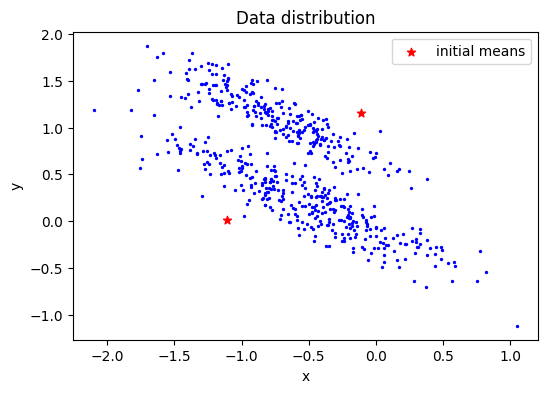

In [95]:

data2 = np.array(data)
x_data= data2[:,0]
y_data = data2[:,1]

x_mean = np.mean(x_data)
y_mean = np.mean(y_data)
x_sd = np.std(x_data)
y_sd = np.std(y_data)

u0 = np.array([x_mean - x_sd, x_mean +x_sd])
u1 = np.array([y_mean - y_sd , y_mean +y_sd])


#plt이용해서 그림 그리는 법

plt.figure(figsize=(6, 4))


plt.scatter(x_data, y_data, c = 'blue', s = 2)
plt.scatter(u0, u1, c = 'red' ,  marker="*", label = "initial means")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data distribution')
plt.legend()

plt.show()


In [100]:
num_k = 2

pi = np.ones(num_k) / num_k

mean1 = np.array([u0[0], u1[0]])
mean2 = np.array([u0[1], u1[1]])

sigma1 = np.array([[x_sd *x_sd /4, 0], [0, y_sd*y_sd/4]])
sigma2 = np.array([[x_sd *x_sd /4, 0], [0, y_sd*y_sd/4]])

R = np.ones([num_k, len(data2)])*(1/ num_k)

j=0
for i in range(9):
    #E-step
    j +=1 
    N0 = sp.stats.multivariate_normal.pdf(data2, mean1 , sigma1) 
    #data 위치에 벡터 넣으면 그 차원만큼 가능도 출력해줌
    N1 = sp.stats.multivariate_normal.pdf(data2, mean2 , sigma2)
    R_old = np.copy(R)

    R = np.array([pi[0]* N0 / (pi[0]*N0 + pi[1]*N1), pi[1]*N1 / (pi[0]*N0 + pi[1]*N1) ])


    if np.linalg.norm(R- R_old) <num_k*len(data2)*0.001:
        print(f"The number of iteration : {j}")
        break 

    pi = np.array([np.sum(R[0,:])/len(data2), np.sum(R[1,:])/len(data2)])

    mean1 = np.dot(data2.T, R[0,:])/np.sum(R[0,:])
    mean2 = np.dot(data2.T, R[1,:])/np.sum(R[1,:])

    mean_1 = mean1.reshape(2, 1)
    mean_2 = mean2.reshape(2, 1)


    sigma1 = np.matmul((R[0, :].reshape(1, -1))*(data2.T - mean_1) , (data2.T - mean_1).T ) / np.sum(R[0,:])  
    sigma2 = np.matmul((R[1, :].reshape(1, -1))*(data2.T - mean_2) , (data2.T - mean_2).T ) / np.sum(R[1,:]) 

print(f"The first mean point is \n{mean1}. \n The second mean point is \n{mean2}.")
print(f"The first sigma is \n{sigma1}. \n The second sigma is \n{sigma2}")


The number of iteration : 8
The first mean point is 
[-0.51044074  0.19135319]. 
 The second mean point is 
[-0.73898005  1.11239236].
The first sigma is 
[[ 0.28784136 -0.17990848]
 [-0.17990848  0.13902848]]. 
 The second sigma is 
[[ 0.16435989 -0.10880309]
 [-0.10880309  0.09172654]]


(2,)

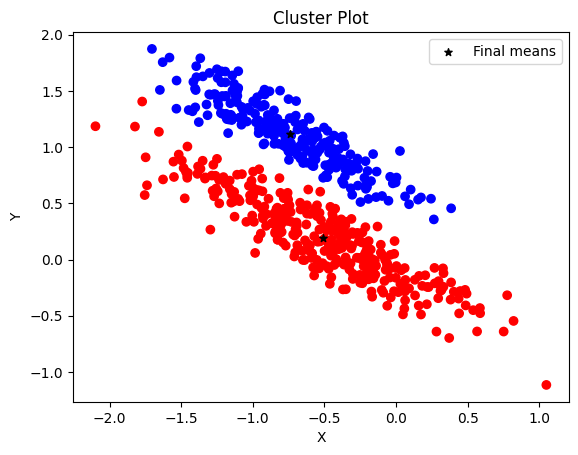

In [110]:
#각 데이터가 주어졌을 때 
k= np.round(R)[0,:].reshape(-1 , 1)
data3 = np.append(data2, k, axis = 1)


x = [d[0] for d in data3]
y = [d[1] for d in data3]
k = [d[2] for d in data3]

mean = np.append

# 클러스터 정보에 따라 적절한 색상 선택
colors = ['red' if cluster == 1 else 'blue' for cluster in k]

# 그래프 그리기
plt.scatter(x, y, color=colors)
plt.scatter([mean1[0], mean2[0]], [mean1[1], mean2[1]] , c= "black", marker = "*", s = 30, label = "Final means")


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cluster Plot')
plt.legend()
plt.show()



/var/folders/j5/bycc_08549v53ss21y_vlcp80000gn/T/ipykernel_76256/3231822710.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


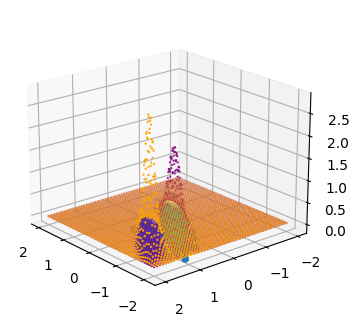

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x=np.linspace(-2, 2, 50)
y=np.linspace(-2, 2, 50)
x, y = np.meshgrid(x, y)

x_new = x.reshape(-1, 1)
y_new = y.reshape(-1 , 1)

gridpoint = np.append(x_new, y_new, axis =1)

z_1 = N0 = sp.stats.multivariate_normal.pdf(gridpoint, mean1 , sigma1) 
z_2 = N1 = sp.stats.multivariate_normal.pdf(gridpoint, mean2 , sigma2) 

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot( projection='3d')


ax.scatter(x_new, y_new, z_1 , c = "purple", s= 0.5)
ax.scatter(x, y, z_2 , c = "orange", s= 0.5)
x = [d[0] for d in data3]
y = [d[1] for d in data3]
ax.scatter(x, y, np.zeros(len(data)))
ax.view_init(20, 140)

fig.show()
